# 1. Modèle de Forêt aléatoire

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Chargement du dataset
df = pd.read_csv("datas/flood.csv")

# Affichage des 1eres lignes
ap="Aperçu des premières lignes:\n"
#print(ap)
print(ap,df.head())

io = "Informations sur la dataset"
print(io, df.info())


Aperçu des premières lignes:
    MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageS

# 2. Traitement des données

In [14]:
target_col = "FloodProbability"
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != target_col]

# Supprimer les outliers pour obtenir une meilleure estimation des tendances centrales
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

MonsoonIntensity: 686 outliers
TopographyDrainage: 711 outliers
RiverManagement: 661 outliers
Deforestation: 682 outliers
Urbanization: 687 outliers
ClimateChange: 647 outliers
DamsQuality: 741 outliers
Siltation: 671 outliers
AgriculturalPractices: 683 outliers
Encroachments: 688 outliers
IneffectiveDisasterPreparedness: 656 outliers
DrainageSystems: 731 outliers
CoastalVulnerability: 747 outliers
Landslides: 645 outliers
Watersheds: 686 outliers
DeterioratingInfrastructure: 663 outliers
PopulationScore: 677 outliers
WetlandLoss: 674 outliers
InadequatePlanning: 670 outliers
PoliticalFactors: 722 outliers


In [15]:
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clean[col] = df_clean[col].clip(lower, upper)

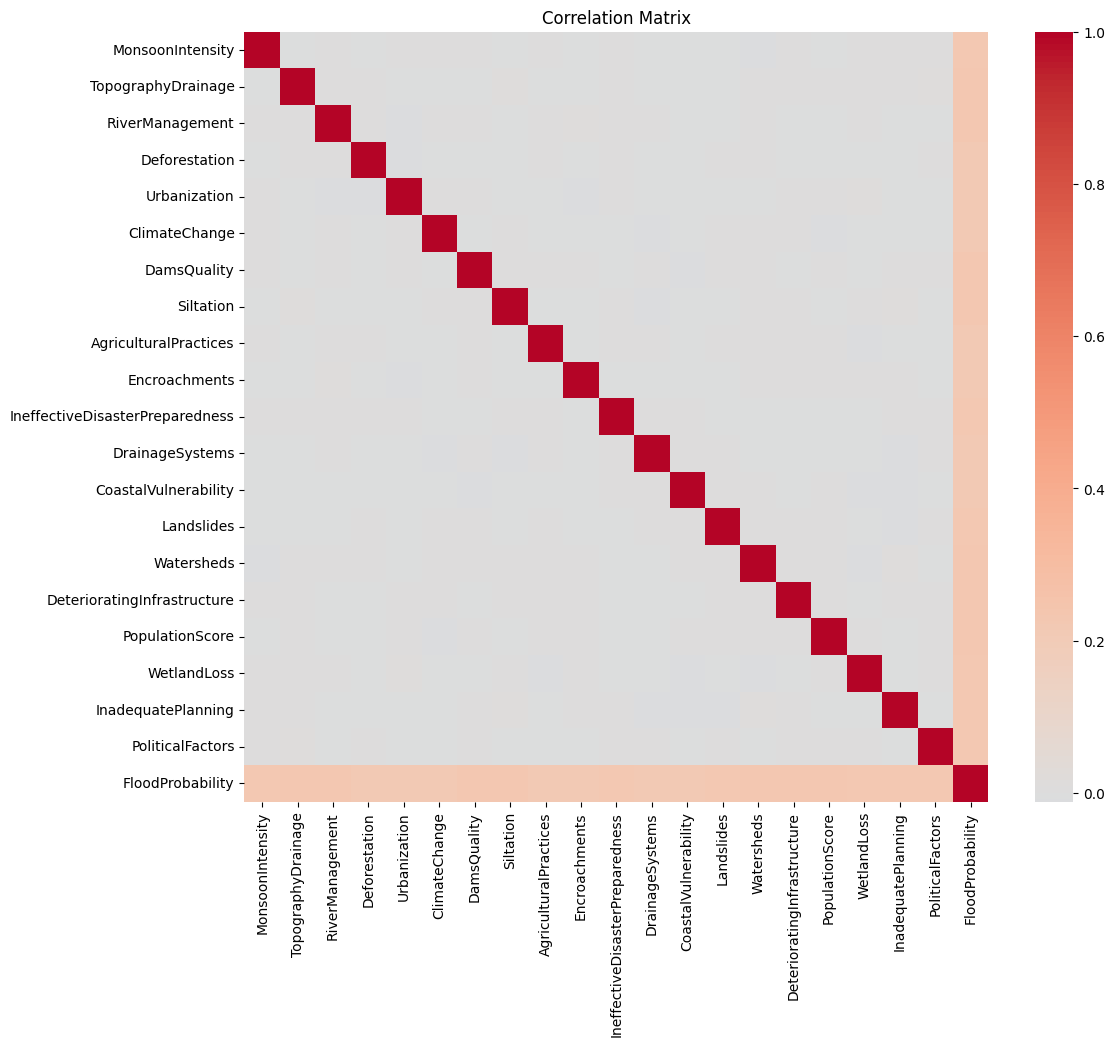

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [21]:

# Features & Target
X = df_clean.drop("FloodProbability", axis=1)
y = df_clean["FloodProbability"]

print("Features choisies!")


Features choisies!


# 3. Séparation et Normalisation des données

In [45]:
from sklearn.preprocessing import StandardScaler

# Diviser les données : 80% pour le training, 20% pour le testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normaliser les données
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creation du modèle (Random Forest - avoir plusieurs personnes intelligentes voter)
model = RandomForestRegressor(
    n_estimators=100,    # Utiliser 100 "decision makers"
    random_state=42      # Rendre les résultats reproduisibles
)

print("Modèle créé")
print(f"Données de train: {len(X_train_scaled)} exemples")
print(f"Données de test: {len(X_test_scaled)} exemples")


Modèle créé
Données de train: 40000 exemples
Données de test: 10000 exemples


# 4. Entrainement, Evaluation et prédiction

In [46]:
# Entrainer le modèle
print("Entrainement...")
model.fit(X_train_scaled, y_train)


Entrainement...


RandomForestRegressor(random_state=42)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
# Test IA
print("Test de l'IA...")
y_pred = model.predict(X_test_scaled)

# # Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


Test de l'IA...
MSE: 0.0006683142915000003
RMSE: 0.025851775403248425
MAE: 0.02040468000000001
R2 Score: 0.7316638091352199


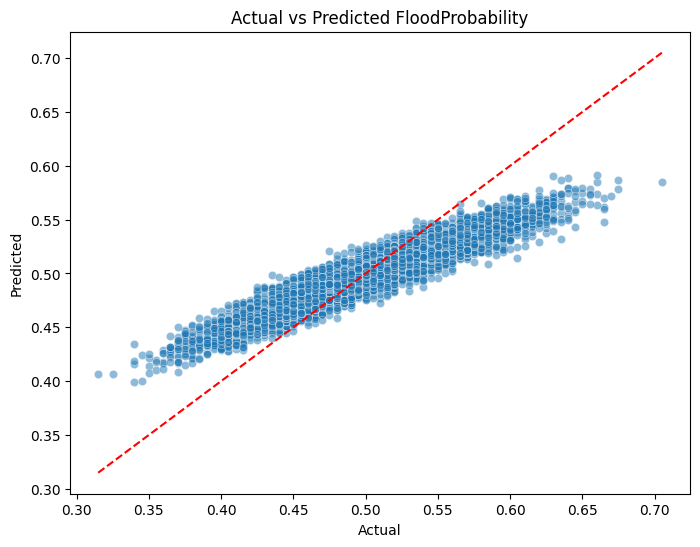

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted FloodProbability")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [49]:
example_input = pd.DataFrame([{
    "MonsoonIntensity": 7,
    "TopographyDrainage": 5,
    "RiverManagement": 6,
    "Deforestation": 7,
    "Urbanization": 6,
    "ClimateChange": 7,
    "DamsQuality": 5,
    "Siltation": 6,
    "AgriculturalPractices": 6,
    "Encroachments": 5,
    "IneffectiveDisasterPreparedness": 6,
    "DrainageSystems": 6,
    "CoastalVulnerability": 5,
    "Landslides": 5,
    "Watersheds": 6,
    "DeterioratingInfrastructure": 6,
    "PopulationScore": 7,
    "WetlandLoss": 6,
    "InadequatePlanning": 6,
    "PoliticalFactors": 5
}])

# 🔍 Predict probability for this location
example_input_scaled = scaler.transform(example_input)
flood_probability = model.predict(example_input_scaled)[0]
print(f"🌊 Predicted Flood Probability: {flood_probability:.4f}")

🌊 Predicted Flood Probability: 0.5693


# 5. Sauvegarde du modèle

In [ ]:
import joblib
import os

# Création du dossier models s'il n'existe pas
models_dir = "models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Sauvegarde (C'est ce modèle qui est généralement utilisé par l'application GUI par défaut)
joblib.dump(model, os.path.join(models_dir, "flood_model.joblib")) # Nom standard attendu par le GUI
joblib.dump(scaler, os.path.join(models_dir, "scaler.joblib"))
joblib.dump(X.columns.tolist(), os.path.join(models_dir, "features.joblib"))

print("Modèle Random Forest (flood_model), scaler et features sauvegardés avec succès !")